In [1]:
import numpy as np
from yahist import Hist1D, Hist2D
import matplotlib.pyplot as plt

np.random.seed(42)

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0.]),
 '_edges': array([0., 1.]),
 '_errors': array([0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood, so, notably, the `weights` kwarg allows one to specify an array of weights. The `metadata` kwarg is attached to the histogram as metadata.

Binning can be specified explicitly as a list of edges
```python
np.linspace(-3,3,31)
```
or as a more compact string following the CERN ROOT-like convention of `nbins,lower,upper`
```python
"30,-3,3"
```
or the `bins` kwarg can be ommitted entirely to use the automatic binning provided by `np.histogram`.


A minimal construction would be:

In [3]:
h = Hist1D(np.random.normal(0, 2, 1000))
h # notebook repr plots to an SVG

[ 1.00 ± 1.00    0.00 ± 0.00    3.00 ± 1.73    3.00 ± 1.73   11.00 ± 3.32
 13.00 ± 3.61   29.00 ± 5.39   46.00 ± 6.78   53.00 ± 7.28   70.00 ± 8.37
 103.00 ± 10.15   87.00 ± 9.33   93.00 ± 9.64   110.00 ± 10.49
 89.00 ± 9.43   86.00 ± 9.27   64.00 ± 8.00   40.00 ± 6.32   38.00 ± 6.16
 23.00 ± 4.80   17.00 ± 4.12   11.00 ± 3.32    6.00 ± 2.45    2.00 ± 1.41
  1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00]

In [4]:
print(h) # terminal repr prints counts and errors

[ 1.00 ± 1.00    0.00 ± 0.00    3.00 ± 1.73    3.00 ± 1.73   11.00 ± 3.32
 13.00 ± 3.61   29.00 ± 5.39   46.00 ± 6.78   53.00 ± 7.28   70.00 ± 8.37
 103.00 ± 10.15   87.00 ± 9.33   93.00 ± 9.64   110.00 ± 10.49
 89.00 ± 9.43   86.00 ± 9.27   64.00 ± 8.00   40.00 ± 6.32   38.00 ± 6.16
 23.00 ± 4.80   17.00 ± 4.12   11.00 ± 3.32    6.00 ± 2.45    2.00 ± 1.41
  1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00]


<AxesSubplot:>

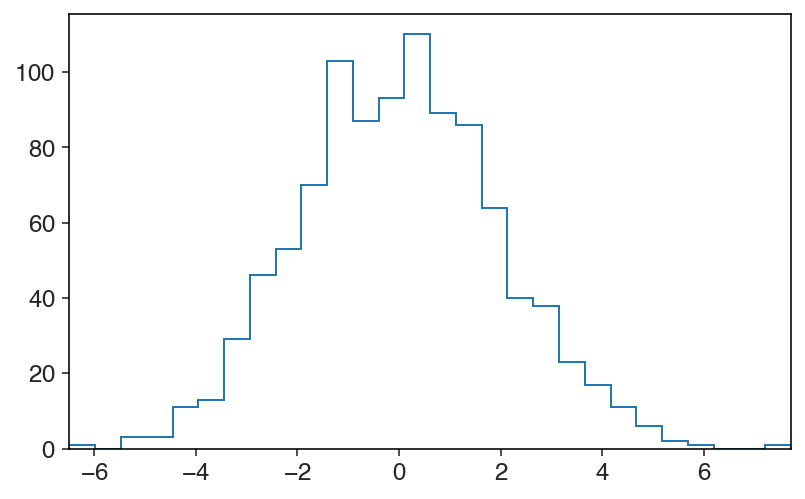

In [5]:
# plot with matplotlib
h.plot()

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [6]:
v = np.random.normal(0,1,2000)

num = Hist1D(v[:500], bins=np.linspace(-3,3,31),label="num", metadata=dict(myattr=2))
den = Hist1D(v, bins="30,-3,3",label="den", weights=np.ones_like(v))

In [7]:
num.metadata

{'label': 'num', 'myattr': 2}

Change the style and show bin counts with some more options.

<AxesSubplot:>

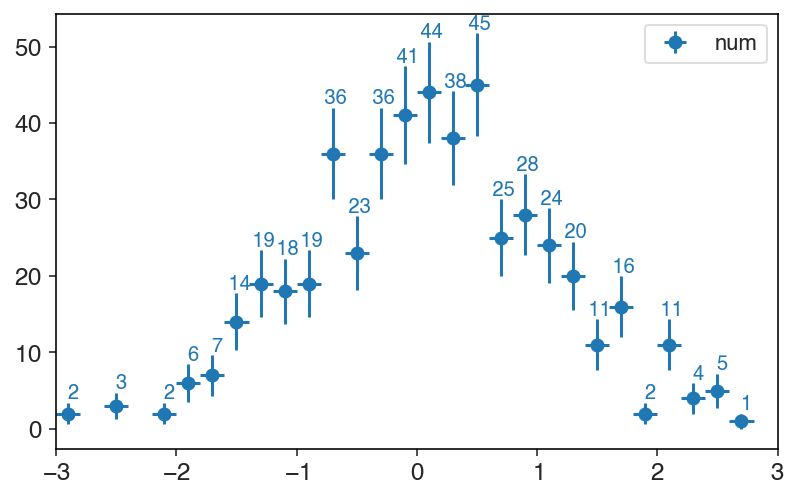

In [8]:
num.plot(errors=True, counts=True)

If you want to quickly pan/zoom with an interactive plot...
(this uses `plotly` instead of `matplotlib` and not all of the regular `plot(interactive=False)` options
are supported/possible)

In [9]:
num.plot(interactive=True)

Do math with the histograms and merge adjacent pairs of bins into one, then restrict the x-axis to a range

<AxesSubplot:>

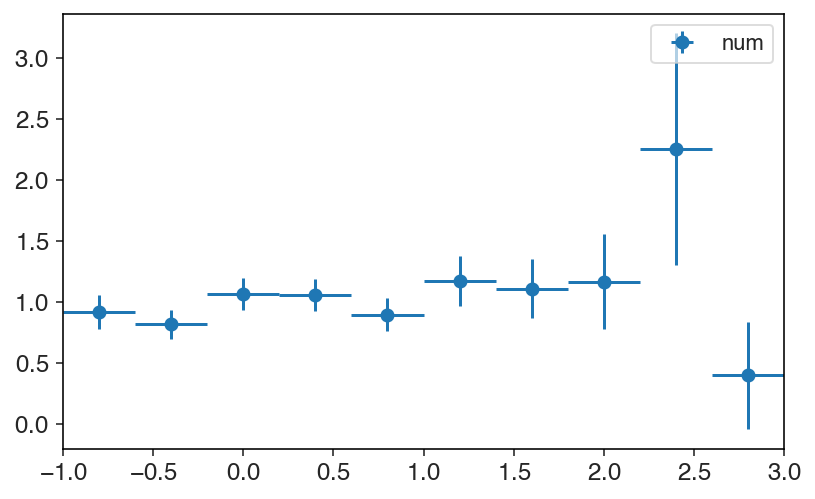

In [10]:
(2*(num/den)).rebin(2).restrict(-1,None).plot(errors=True)

By default, overflows are clipped to fall into the edges of the histogram range. This can be disabled (effectively ignoring entries outside of the bin range).

<AxesSubplot:>

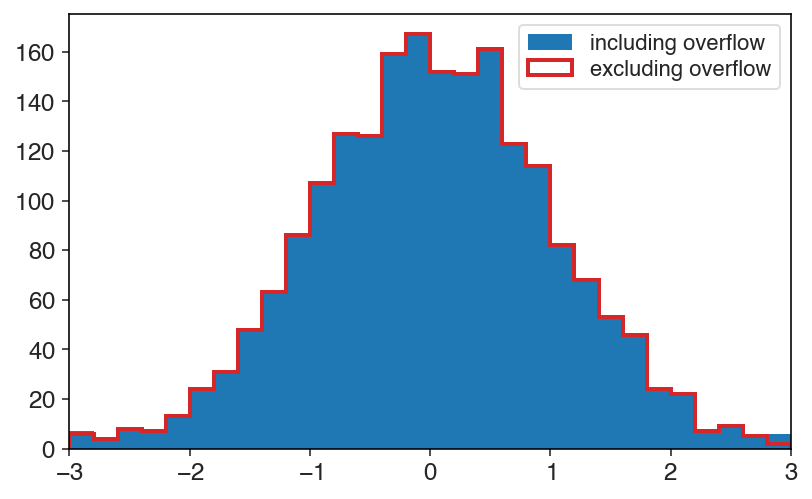

In [11]:
h1 = Hist1D(v, bins="30,-3,3")
h2 = Hist1D(v, bins="30,-3,3", overflow=False)

h1.plot(label="including overflow", histtype="stepfilled")
h2.plot(label="excluding overflow", color="C3", linewidth=2)

Make a more complicated plot with a ratio panel.

<AxesSubplot:>

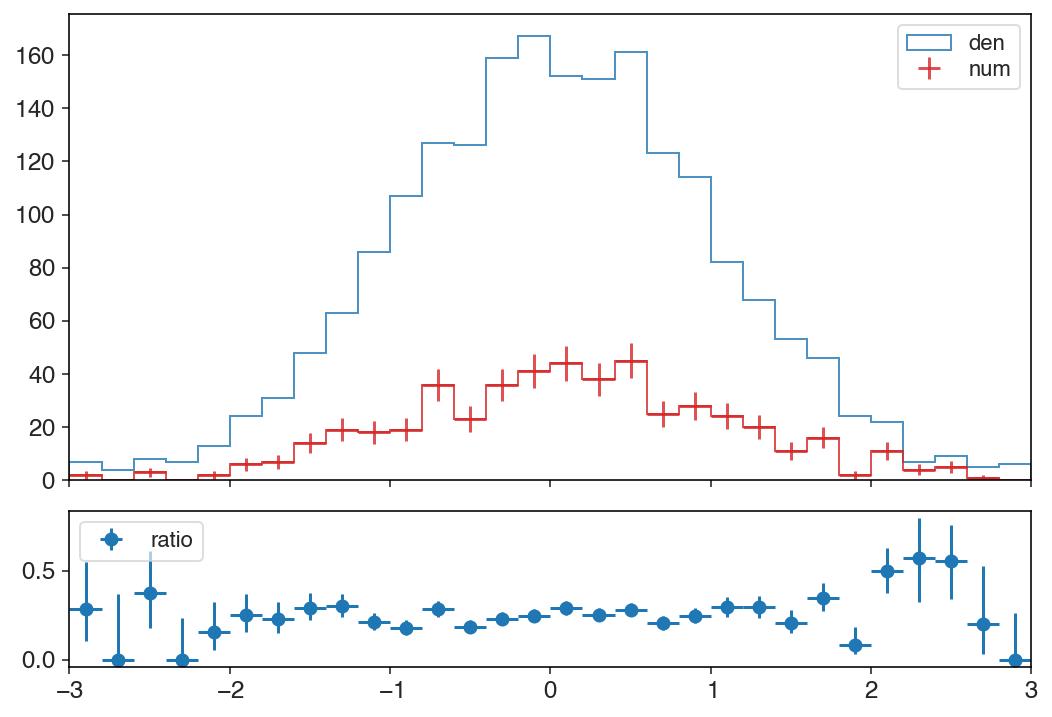

In [12]:
fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(8,6), gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1, alpha=0.8, color="C0")
num.plot(ax=ax1, alpha=0.8, color="C3", label=None)
num.plot(ax=ax1, alpha=0.8, color="C3", errors=True, ms=0.)
# Gaussian errors
#    (num/den).plot(ax=ax2,show_errors=True,label="ratio")
# Asymmetric Clopper-Pearson errors
num.divide(den, binomial=True).plot(ax=ax2, errors=True, label="ratio")

Generate histograms from `scipy.stats.<distribution>` random distributions quickly

In [13]:
Hist1D.from_random("expon")

[4551.00 ± 67.46   4497.00 ± 67.06   4184.00 ± 64.68   4007.00 ± 63.30
 3729.00 ± 61.07   3732.00 ± 61.09   3422.00 ± 58.50   3278.00 ± 57.25
 3293.00 ± 57.38   2958.00 ± 54.39   2754.00 ± 52.48   2830.00 ± 53.20
 2572.00 ± 50.71   2469.00 ± 49.69   2389.00 ± 48.88   2304.00 ± 48.00
 2190.00 ± 46.80   2097.00 ± 45.79   1957.00 ± 44.24   1865.00 ± 43.19
 1822.00 ± 42.68   1693.00 ± 41.15   1688.00 ± 41.09   1566.00 ± 39.57
 1490.00 ± 38.60   1428.00 ± 37.79   1359.00 ± 36.86   1286.00 ± 35.86
 1168.00 ± 34.18   1212.00 ± 34.81   1082.00 ± 32.89   1096.00 ± 33.11
 1028.00 ± 32.06   975.00 ± 31.22   889.00 ± 29.82   904.00 ± 30.07
 882.00 ± 29.70   815.00 ± 28.55   744.00 ± 27.28   709.00 ± 26.63
 717.00 ± 26.78   688.00 ± 26.23   630.00 ± 25.10   644.00 ± 25.38
 578.00 ± 24.04   555.00 ± 23.56   548.00 ± 23.41   496.00 ± 22.27
 459.00 ± 21.42   451.00 ± 21.24   440.00 ± 20.98   409.00 ± 20.22
 401.00 ± 20.02   365.00 ± 19.10   348.00 ± 18.65   362.00 ± 19.03
 349.00 ± 18.68   319.00 ± 17.86   297.00 ± 17.23   260.00 ± 16.12
 263.00 ± 16.22   264.00 ± 16.25   258.00 ± 16.06   237.00 ± 15.39
 229.00 ± 15.13   206.00 ± 14.35   213.00 ± 14.59   186.00 ± 13.64
 169.00 ± 13.00   175.00 ± 13.23   152.00 ± 12.33   155.00 ± 12.45
 158.00 ± 12.57   157.00 ± 12.53   128.00 ± 11.31   144.00 ± 12.00
 113.00 ± 10.63   116.00 ± 10.77   114.00 ± 10.68   105.00 ± 10.25
 112.00 ± 10.58   89.00 ± 9.43   94.00 ± 9.70   65.00 ± 8.06
 83.00 ± 9.11   82.00 ± 9.06   83.00 ± 9.11   66.00 ± 8.12   72.00 ± 8.49
 76.00 ± 8.72   69.00 ± 8.31   68.00 ± 8.25   43.00 ± 6.56   54.00 ± 7.35
 58.00 ± 7.62   54.00 ± 7.35   52.00 ± 7.21   60.00 ± 7.75   46.00 ± 6.78
 41.00 ± 6.40   30.00 ± 5.48   37.00 ± 6.08   46.00 ± 6.78   34.00 ± 5.83
 43.00 ± 6.56   28.00 ± 5.29   33.00 ± 5.74   33.00 ± 5.74   35.00 ± 5.92
 20.00 ± 4.47   22.00 ± 4.69   14.00 ± 3.74   16.00 ± 4.00   17.00 ± 4.12
 28.00 ± 5.29   18.00 ± 4.24   18.00 ± 4.24   27.00 ± 5.20   11.00 ± 3.32
 10.00 ± 3.16   19.00 ± 4.36   14.00 ± 3.74   10.00 ± 3.16   13.00 ± 3.61
 15.00 ± 3.87   12.00 ± 3.46   16.00 ± 4.00    9.00 ± 3.00    6.00 ± 2.45
 11.00 ± 3.32    8.00 ± 2.83    9.00 ± 3.00    7.00 ± 2.65    8.00 ± 2.83
  8.00 ± 2.83    8.00 ± 2.83   11.00 ± 3.32   10.00 ± 3.16    7.00 ± 2.65
 14.00 ± 3.74    7.00 ± 2.65    7.00 ± 2.65    7.00 ± 2.65    6.00 ± 2.45
  6.00 ± 2.45    5.00 ± 2.24    4.00 ± 2.00    1.00 ± 1.00    4.00 ± 2.00
  2.00 ± 1.41    3.00 ± 1.73    1.00 ± 1.00    3.00 ± 1.73    2.00 ± 1.41
  1.00 ± 1.00    3.00 ± 1.73    3.00 ± 1.73    3.00 ± 1.73    3.00 ± 1.73
  4.00 ± 2.00    1.00 ± 1.00    2.00 ± 1.41    0.00 ± 0.00    4.00 ± 2.00
  0.00 ± 0.00    3.00 ± 1.73    1.00 ± 1.00    2.00 ± 1.41    1.00 ± 1.00
  2.00 ± 1.41    2.00 ± 1.41    3.00 ± 1.73    2.00 ± 1.41    1.00 ± 1.00
  1.00 ± 1.00    0.00 ± 0.00    3.00 ± 1.73    1.00 ± 1.00    0.00 ± 0.00
  2.00 ± 1.41    1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00
  1.00 ± 1.00    2.00 ± 1.41    0.00 ± 0.00    1.00 ± 1.00    1.00 ± 1.00
  2.00 ± 1.41    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00]

In [14]:
Hist1D.from_random("norm", bins="100,-3,3", size=1e3)

[ 0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    2.00 ± 1.41    1.00 ± 1.00    1.00 ± 1.00
  1.00 ± 1.00    1.00 ± 1.00    4.00 ± 2.00    3.00 ± 1.73    5.00 ± 2.24
  5.00 ± 2.24    4.00 ± 2.00    3.00 ± 1.73    7.00 ± 2.65    7.00 ± 2.65
  6.00 ± 2.45    4.00 ± 2.00    6.00 ± 2.45    3.00 ± 1.73    9.00 ± 3.00
  8.00 ± 2.83    1.00 ± 1.00    6.00 ± 2.45   11.00 ± 3.32   13.00 ± 3.61
 12.00 ± 3.46   13.00 ± 3.61   13.00 ± 3.61   19.00 ± 4.36   11.00 ± 3.32
 14.00 ± 3.74   16.00 ± 4.00   15.00 ± 3.87   23.00 ± 4.80   19.00 ± 4.36
 28.00 ± 5.29   29.00 ± 5.39   27.00 ± 5.20   22.00 ± 4.69   23.00 ± 4.80
 17.00 ± 4.12   22.00 ± 4.69   23.00 ± 4.80   25.00 ± 5.00   16.00 ± 4.00
 20.00 ± 4.47   25.00 ± 5.00   22.00 ± 4.69   23.00 ± 4.80   22.00 ± 4.69
 24.00 ± 4.90   18.00 ± 4.24   22.00 ± 4.69   24.00 ± 4.90   23.00 ± 4.80
 24.00 ± 4.90   15.00 ± 3.87   16.00 ± 4.00   19.00 ± 4.36   15.00 ± 3.87
 16.00 ± 4.00   10.00 ± 3.16   18.00 ± 4.24   19.00 ± 4.36   12.00 ± 3.46
  8.00 ± 2.83    4.00 ± 2.00    7.00 ± 2.65    6.00 ± 2.45    9.00 ± 3.00
 11.00 ± 3.32    8.00 ± 2.83   11.00 ± 3.32    7.00 ± 2.65    5.00 ± 2.24
  8.00 ± 2.83    2.00 ± 1.41    2.00 ± 1.41    3.00 ± 1.73    2.00 ± 1.41
  1.00 ± 1.00    2.00 ± 1.41    4.00 ± 2.00    3.00 ± 1.73    2.00 ± 1.41
  3.00 ± 1.73    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    3.00 ± 1.73]

In [15]:
Hist1D.from_random("norm", params=[1, 0.5])

[ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  3.00 ± 1.73    3.00 ± 1.73    3.00 ± 1.73    2.00 ± 1.41    4.00 ± 2.00
  3.00 ± 1.73   11.00 ± 3.32   10.00 ± 3.16    9.00 ± 3.00    6.00 ± 2.45
  6.00 ± 2.45   21.00 ± 4.58   22.00 ± 4.69   26.00 ± 5.10   27.00 ± 5.20
 38.00 ± 6.16   32.00 ± 5.66   53.00 ± 7.28   65.00 ± 8.06   56.00 ± 7.48
 57.00 ± 7.55   84.00 ± 9.17   103.00 ± 10.15   100.00 ± 10.00
 141.00 ± 11.87   147.00 ± 12.12   207.00 ± 14.39   208.00 ± 14.42
 217.00 ± 14.73   292.00 ± 17.09   286.00 ± 16.91   313.00 ± 17.69
 339.00 ± 18.41   384.00 ± 19.60   443.00 ± 21.05   521.00 ± 22.83
 494.00 ± 22.23   634.00 ± 25.18   640.00 ± 25.30   759.00 ± 27.55
 828.00 ± 28.77   805.00 ± 28.37   888.00 ± 29.80   970.00 ± 31.14
 1106.00 ± 33.26   1123.00 ± 33.51   1219.00 ± 34.91   1303.00 ± 36.10
 1408.00 ± 37.52   1446.00 ± 38.03   1539.00 ± 39.23   1663.00 ± 40.78
 1739.00 ± 41.70   1760.00 ± 41.95   1820.00 ± 42.66   1965.00 ± 44.33
 1989.00 ± 44.60   1985.00 ± 44.55   2066.00 ± 45.45   2109.00 ± 45.92
 2245.00 ± 47.38   2325.00 ± 48.22   2263.00 ± 47.57   2311.00 ± 48.07
 2280.00 ± 47.75   2350.00 ± 48.48   2275.00 ± 47.70   2244.00 ± 47.37
 2312.00 ± 48.08   2223.00 ± 47.15   2185.00 ± 46.74   2217.00 ± 47.09
 2137.00 ± 46.23   2123.00 ± 46.08   2115.00 ± 45.99   1951.00 ± 44.17
 1971.00 ± 44.40   1839.00 ± 42.88   1708.00 ± 41.33   1660.00 ± 40.74
 1597.00 ± 39.96   1573.00 ± 39.66   1455.00 ± 38.14   1400.00 ± 37.42
 1235.00 ± 35.14   1168.00 ± 34.18   1158.00 ± 34.03   1100.00 ± 33.17
 995.00 ± 31.54   908.00 ± 30.13   821.00 ± 28.65   797.00 ± 28.23
 739.00 ± 27.18   612.00 ± 24.74   555.00 ± 23.56   529.00 ± 23.00
 473.00 ± 21.75   419.00 ± 20.47   398.00 ± 19.95   360.00 ± 18.97
 305.00 ± 17.46   285.00 ± 16.88   251.00 ± 15.84   223.00 ± 14.93
 190.00 ± 13.78   174.00 ± 13.19   141.00 ± 11.87   143.00 ± 11.96
 124.00 ± 11.14   96.00 ± 9.80   78.00 ± 8.83   87.00 ± 9.33
 64.00 ± 8.00   51.00 ± 7.14   56.00 ± 7.48   39.00 ± 6.24   21.00 ± 4.58
 23.00 ± 4.80   22.00 ± 4.69   19.00 ± 4.36    9.00 ± 3.00   15.00 ± 3.87
 17.00 ± 4.12    3.00 ± 1.73    6.00 ± 2.45    5.00 ± 2.24    4.00 ± 2.00
  3.00 ± 1.73    5.00 ± 2.24    3.00 ± 1.73    4.00 ± 2.00    2.00 ± 1.41
  1.00 ± 1.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00]

In [16]:
try:
    Hist1D.from_random("blah")
except Exception as e:
    print(e)

blah is not a valid distribution in `scipy.stats`. Valid distributions are: ['alpha', 'anglit', 'arcsine', 'argus', 'bernoulli', 'beta', 'betabinom', 'betaprime', 'binom', 'boltzmann', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dirichlet', 'dlaplace', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'geom', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypergeom', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'invwishart', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'logser', 'loguniform', 'lomax', 'matrix_normal', 'maxwel

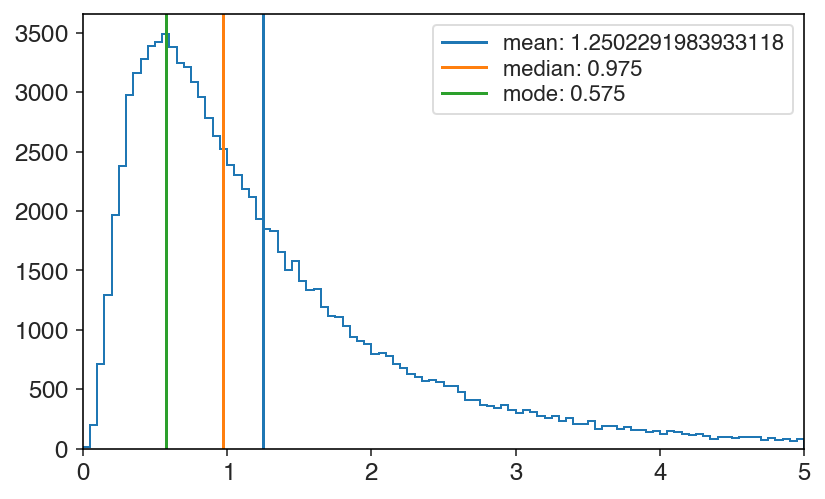

In [17]:
fig, ax = plt.subplots()

h = Hist1D.from_random("lognorm", params=[0.8], bins="100,0,5", overflow=False)
h.plot()

ax.axvline(h.mean(), label=f"mean: {h.mean()}", color="C0")
ax.axvline(h.median(), label=f"median: {h.median()}", color="C1")
ax.axvline(h.mode(), label=f"mode: {h.mode()}", color="C2")

ax.legend()

You can use one histogram as a probability distribution function for sampling new values. 

<AxesSubplot:>

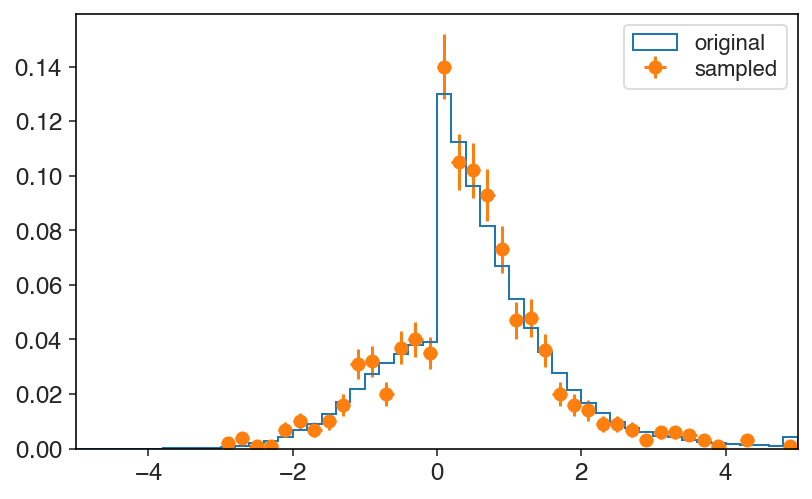

In [18]:
h1 = Hist1D.from_random("norm", bins="50,-5,5") + Hist1D.from_random("expon", bins="50,-5,5")
h2 = Hist1D(h1.sample(1e3), bins=h1.edges)

h1.normalize().plot(label="original")
h2.normalize().plot(histtype="step", label="sampled", show_errors=True)

Histogram objects and their metadata can be de/serialized from/to json.

In [19]:
num.to_json()

# or directly to a file
#    num.to_json("test.json")
#    num = Hist1D.from_json("test.json")

'{"_counts": [2.0, 0.0, 3.0, 0.0, 2.0, 6.0, 7.0, 14.0, 19.0, 18.0, 19.0, 36.0, 23.0, 36.0, 41.0, 44.0, 38.0, 45.0, 25.0, 28.0, 24.0, 20.0, 11.0, 16.0, 2.0, 11.0, 4.0, 5.0, 1.0, 0.0], "_edges": [-3.0, -2.8, -2.5999999999999996, -2.4000000000000004, -2.2, -2.0, -1.8000000000000003, -1.5999999999999999, -1.4000000000000001, -1.1999999999999997, -1.0, -0.8, -0.5999999999999996, -0.3999999999999999, -0.20000000000000018, 0.0, 0.20000000000000018, 0.3999999999999999, 0.5999999999999996, 0.7999999999999998, 1.0, 1.1999999999999995, 1.3999999999999995, 1.6000000000000005, 1.8000000000000005, 2.0, 2.2, 2.4000000000000004, 2.5999999999999996, 2.8, 2.9999999999999996], "_errors": [1.4142135623730951, 0.0, 1.7320508075688772, 0.0, 1.4142135623730951, 2.449489742783178, 2.6457513110645907, 3.7416573867739413, 4.358898943540674, 4.242640687119285, 4.358898943540674, 6.0, 4.795831523312719, 6.0, 6.4031242374328485, 6.6332495807108, 6.164414002968976, 6.708203932499369, 5.0, 5.291502622129181, 4.89897

In [20]:
Hist1D.from_json(num.to_json())

[ 2.00 ± 1.41    0.00 ± 0.00    3.00 ± 1.73    0.00 ± 0.00    2.00 ± 1.41
  6.00 ± 2.45    7.00 ± 2.65   14.00 ± 3.74   19.00 ± 4.36   18.00 ± 4.24
 19.00 ± 4.36   36.00 ± 6.00   23.00 ± 4.80   36.00 ± 6.00   41.00 ± 6.40
 44.00 ± 6.63   38.00 ± 6.16   45.00 ± 6.71   25.00 ± 5.00   28.00 ± 5.29
 24.00 ± 4.90   20.00 ± 4.47   11.00 ± 3.32   16.00 ± 4.00    2.00 ± 1.41
 11.00 ± 3.32    4.00 ± 2.00    5.00 ± 2.24    1.00 ± 1.00    0.00 ± 0.00]

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors. Binning can be left off to use auto-binning, or it can be specified as for `np.histogram2d()`:

  * `bins=50, range=[[-5,5],[-2,2]]`
  
  * `bins=[np.linspace(-5,5,51), np.linspace(-2,2,21)`
  
or, similarly to `Hist1D`, as a string:

  * `bins="50,-5,5"` (same binning for both dimensions)
  
  * `bins="50,-5,5,20,-2,2"` (different binning for each dimension)

In [21]:
x = np.random.normal(0,1,50000)
y = np.random.normal(0,1,50000)
h = Hist2D((x, y), bins="50,-3,3")
# or a 2-column matrix
#   h = Hist2D(np.c_[x, y], bins="50,-3,3")

print(str(h))

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]]


Similar to the 1D object, the HTML representation for 2D histograms is a rendered plot.

In [22]:
h

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]]

Hist2D filling uses the amazing `boost-histogram`, which is several times faster than `np.histogram2d` already. And by default, the filling is threaded.

In [23]:
%%time
x, y = np.random.normal(0, 1, size=(int(5e6), 2)).T

CPU times: user 309 ms, sys: 27.6 ms, total: 336 ms
Wall time: 336 ms


In [24]:
%%time
_ = Hist2D((x, y), bins="50,-3,3") # default to autodetect best number of threads

CPU times: user 109 ms, sys: 62.5 ms, total: 171 ms
Wall time: 51.1 ms


In [25]:
%%time
_ = Hist2D((x, y), bins="50,-3,3", threads=1) # back to single threaded to see the difference

CPU times: user 83.2 ms, sys: 44.1 ms, total: 127 ms
Wall time: 127 ms


In [26]:
%%time
# :(
_ = np.histogram2d(x, y, bins=np.linspace(-3,3,51))

CPU times: user 481 ms, sys: 59.1 ms, total: 540 ms
Wall time: 541 ms


Plot a `Hist2D` explicitly with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

(<matplotlib.image.AxesImage at 0x12a5d40b8>, <AxesSubplot:>)

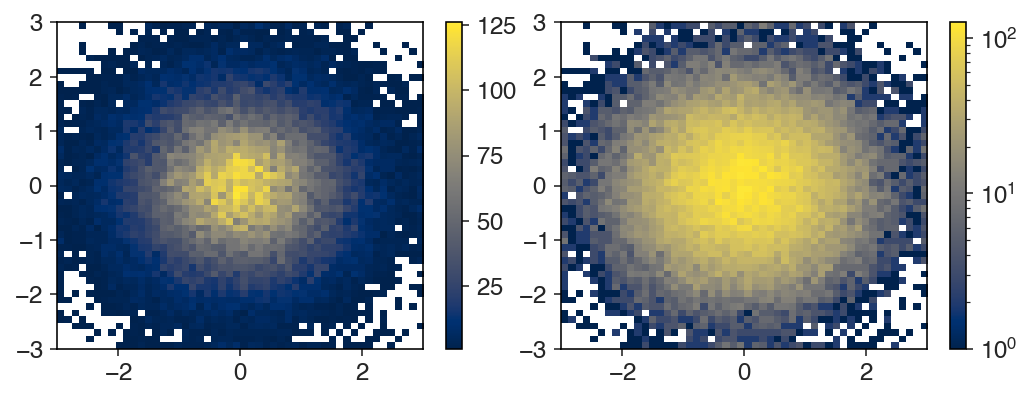

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="cividis")
h.plot(ax=ax2, cmap="cividis", logz=True)

(<matplotlib.image.AxesImage at 0x11b400fd0>, <AxesSubplot:>)

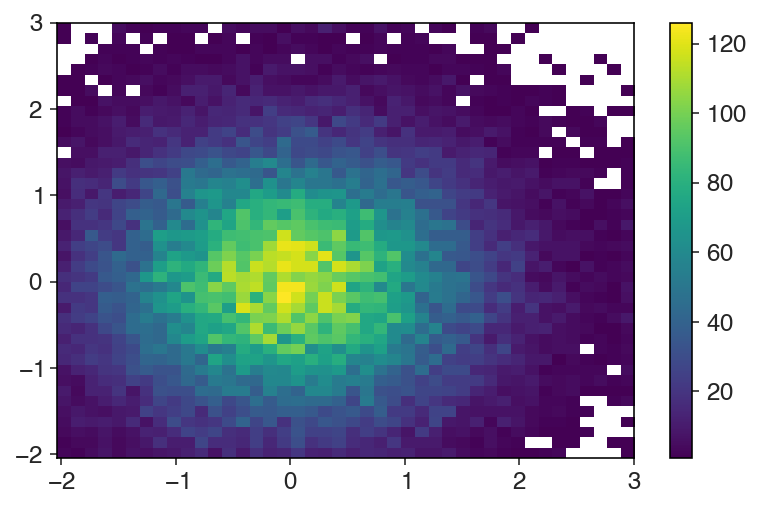

In [28]:
h.restrict(ylow=-2, xlow=-2).plot()

As for `Hist1D`, interactivity with `plotly` is possible.

In [29]:
h = ( Hist2D.from_random(size=1e3, params=[+2,1], bins="30,-5,5") 
    + Hist2D.from_random(size=1e3, params=[-2,1], bins="30,-5,5")
)
fig = h.plot(interactive=True, logz=True, cmap="cividis")
fig = h.profile("x").plot(interactive=True, errors=True, fig=fig, color="C0", label="x profile")
fig = h.profile("y").plot(interactive=True, errors=True, fig=fig, color="C1", label="y profile", flipxy=True)
fig

Chain a few methods together. `projection("x")` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

<AxesSubplot:>

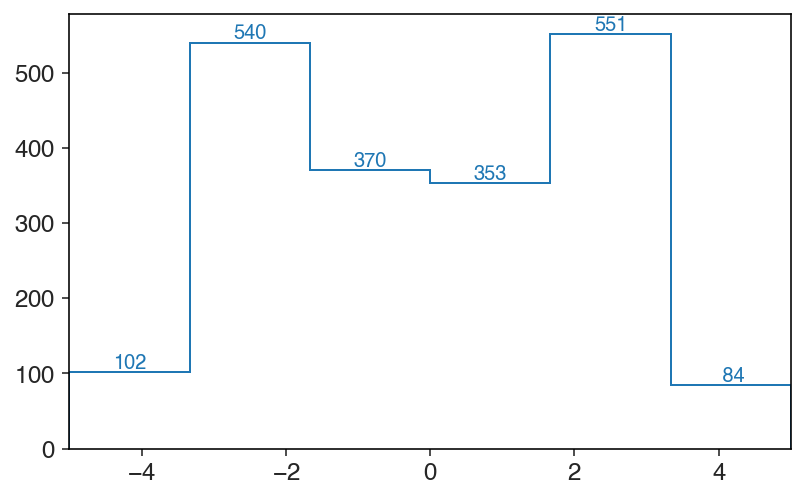

In [30]:
(h
 .rebin(5)
 .projection("x")
 .plot(show_counts=True)
)

`profile("x")` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

<AxesSubplot:>

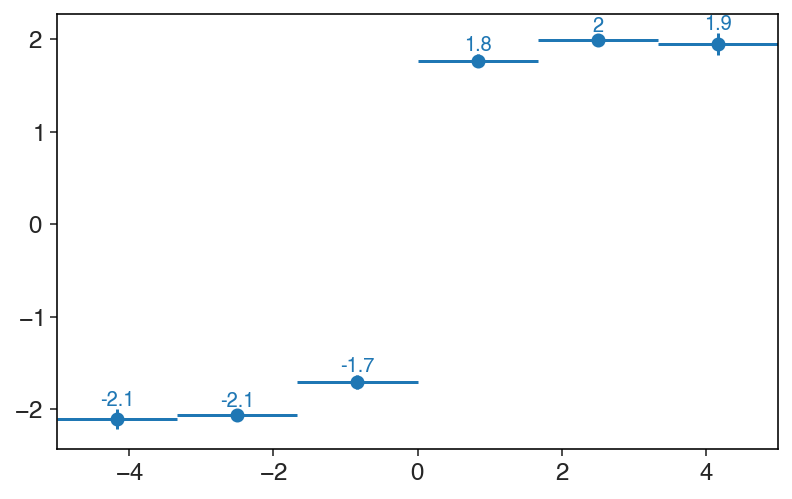

In [31]:
(h
 .rebin(5)
 .profile("x")
 .plot(show_counts=True,show_errors=True, counts_fmt_func="{:.2g}".format)
)

Hist2D is aware of pandas DataFrame column names.

(<matplotlib.image.AxesImage at 0x1316121d0>,
 <AxesSubplot:xlabel='xlabel', ylabel='ylabel'>)

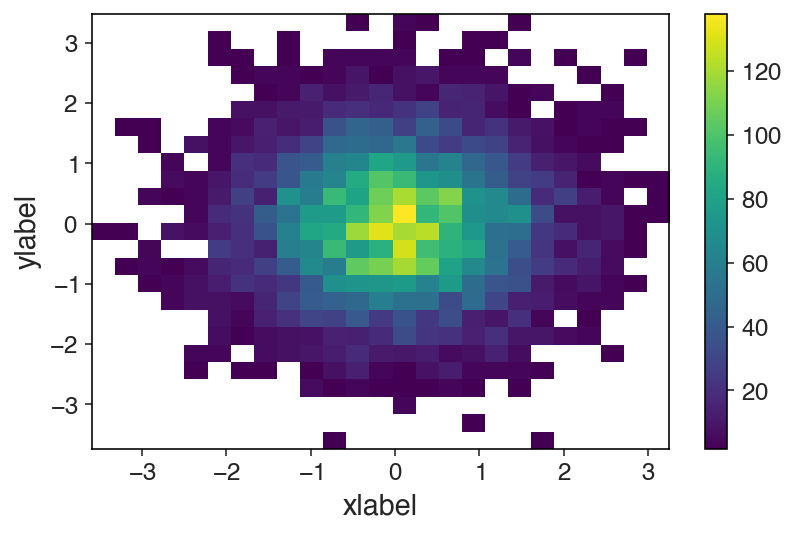

In [32]:
import pandas as pd
df = pd.DataFrame()
df["xlabel"] = np.random.normal(size=5000)
df["ylabel"] = np.random.normal(size=5000)
df["z"] = np.random.normal(2,0.1, size=5000)
Hist2D(df[["xlabel","ylabel"]], weights=df["z"], bins=25).plot()

When non-uniform bins are specified, it can be hard to see some bin contents. In this case, the `equidistant=""/"x"/"y"/"xy"` parameter can be used to make the bin sizes (visually) equal.

(<matplotlib.image.AxesImage at 0x131b07860>, <AxesSubplot:>)

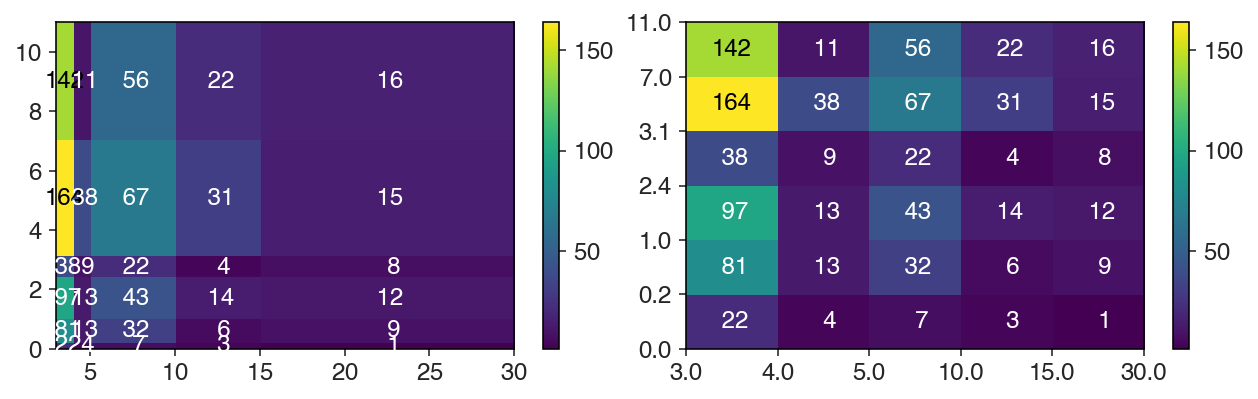

In [33]:
bins = [
    np.array([3,4,5,10,15,30]),
    np.array([0,0.2,1.0,2.4,3.1,7.0,11.]),
]
h = Hist2D.from_random("expon", params=[0, 5], bins=bins, size=1e3, random_state=42)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
h.plot(ax=ax1, show_counts=True)
h.plot(ax=ax2, show_counts=True, equidistant="xy")

## Stacking histograms

The `bottom` kwarg of `plt.hist()` allows one to easily stack histograms, so the wrapper code in `utils.plot_stack` is only 2-3 lines of logic.
To keep it this simple, the `Hist1D` objects must have been constructed with `color=` and/or `label=` specified in order to style/label them individually within `Hist1D.plot()`.

In [34]:
from yahist.utils import plot_stack
import inspect
print(inspect.getsource(plot_stack))

def plot_stack(hists, **kwargs):
    """
    Plots a list of `Hist1D` objects as a stack

    Parameters
    ----------
    hists : list of `Hist1D` objects
    kwargs : passed to `Hist1D.plot()`
    """
    bottom = 0.0
    for h in hists:
        h.plot(bottom=bottom, **kwargs)
        bottom += h.counts



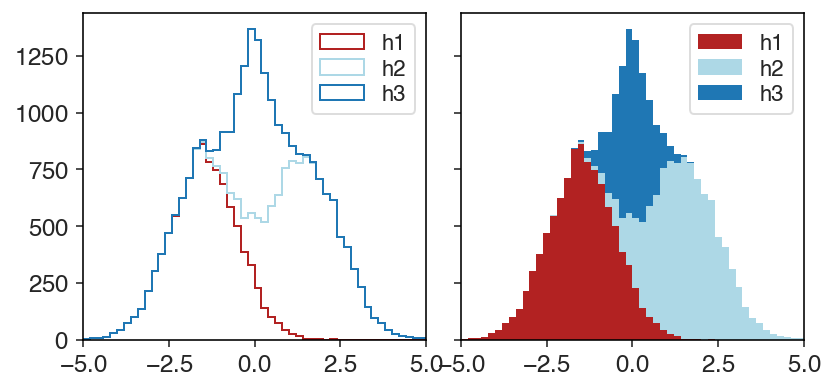

In [35]:
h1 = Hist1D(np.random.normal(-1.5,1,10000), bins="50,-5,5", color="firebrick", label="h1")
h2 = Hist1D(np.random.normal(1.5,1,10000), bins="50,-5,5", color="lightblue", label="h2")
h3 = Hist1D(np.random.normal(0.0,0.5,5000), bins="50,-5,5", label="h3")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6,3),sharey=True)
plot_stack([h1,h2,h3],ax=ax1)
plot_stack([h1,h2,h3],histtype="stepfilled",ax=ax2)

## Simple fits

While this is not a fitting package, there is a function for conveniently fitting a user-provided 
function to a histogram, taking into account the histogram errors. The function is a wrapper around `scipy.optimize.curve_fit`.

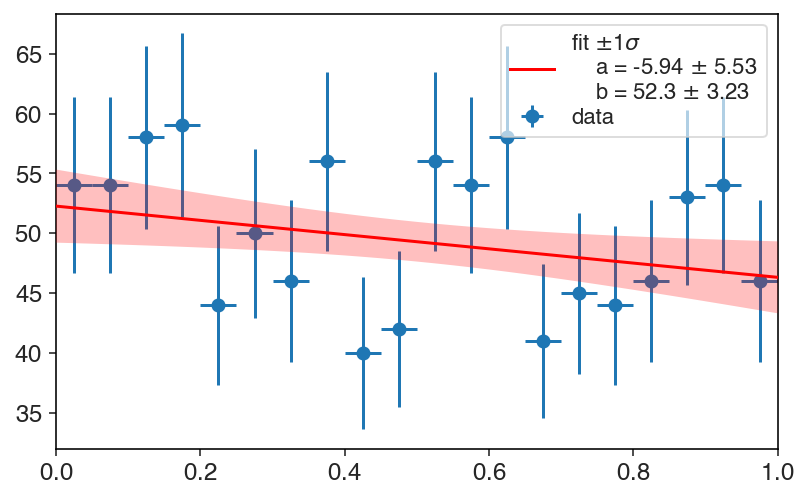

In [36]:
np.random.seed(42)
h = Hist1D(np.random.random(1000), bins="20,0,1")
h.plot(show_errors=True, label="data")
# parses an expression string, assuming the main parameter is `x`
res = h.fit("a*x+b")
# OR h.fit(lambda x,a,b: a*x+b)

Note that `curve_fit` minimizes chi2 by default. To minimize log likelihood, pass the `likelihood=True` option. In the limit of large counts, both are equivalent. Log likelihood is correct for low counts, especially when some bins are empty.

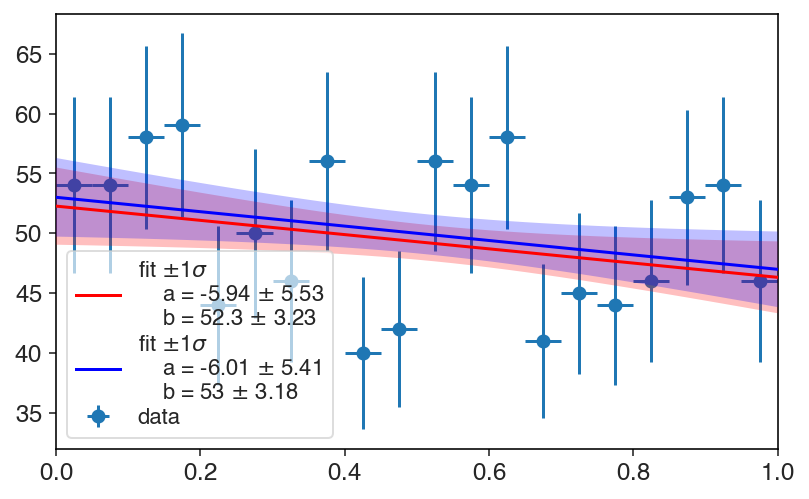

In [37]:
h.plot(show_errors=True, label="data")
res = h.fit("a*x+b", color="r")
res = h.fit("a*x+b", color="b", likelihood=True)

A fit to a subset of a histogram can be done via `h.restrict(a, b).fit(...)` but it will only be drawn for that range. To fit to a subset of a `Hist1D` but draw it for a full range, use `extent=[]`.

Note that `"gaus"` is a much-needed shorthand for `"constant * np.exp((-x-mean)**2 / (2*sigma**2))"`.

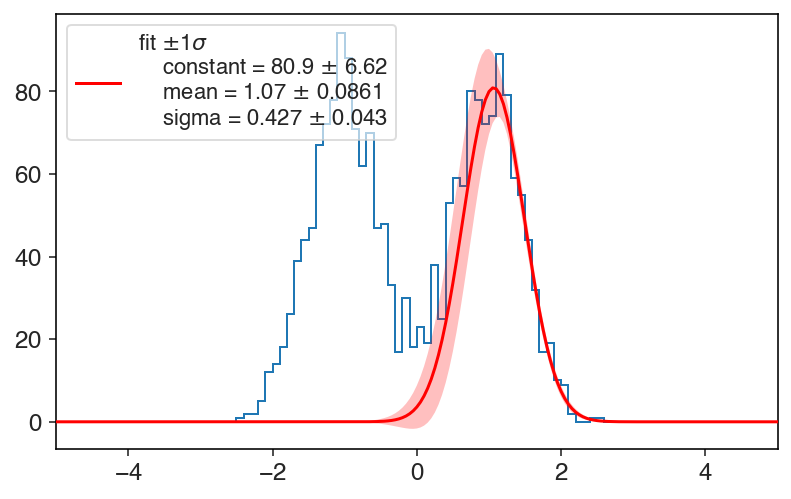

In [38]:
h1 = Hist1D.from_random("norm", params=(+1, 0.5), size=1e3, bins="100,-5,5")
h2 = Hist1D.from_random("norm", params=(-1, 0.5), size=1e3, bins="100,-5,5")
h = (h1+h2)
h.plot()
_ = h.fit("gaus", extent=[1, None])

A slightly more complicated fit, with a ratio panel...

<AxesSubplot:>

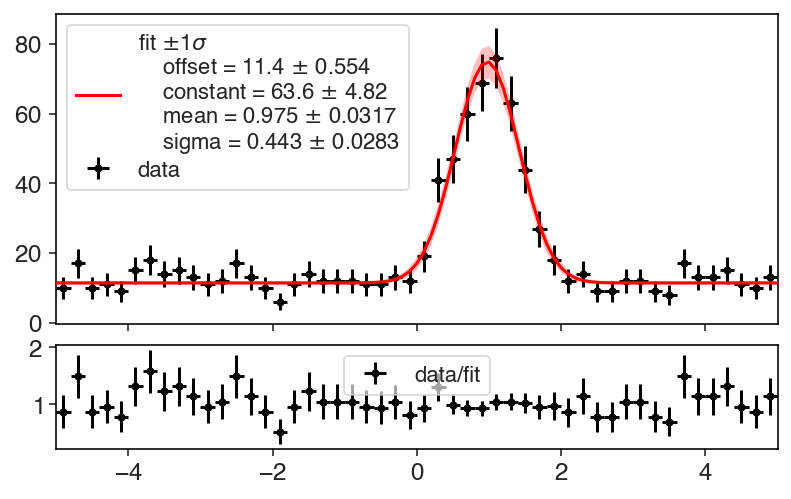

In [39]:
np.random.seed(42)

fig,(ax1,ax2) = plt.subplots(2,sharex=True,gridspec_kw=dict(height_ratios=[3, 1]))

bins = "50,-5,5"
hdata = (Hist1D(np.random.normal(1,0.5,350), bins=bins) 
         + Hist1D(10*np.random.random(600)-5, bins=bins))
hdata.plot(ax=ax1,show_errors=True, color="k",markersize=3,label="data")

result = hdata.fit("offset+gaus", ax=ax1)

ratio = (hdata/result["hfit"])
ratio.plot(ax=ax2, color="k", label="data/fit", show_errors=True,markersize=3)

The returned `result` object has an HTML representation for notebooks showing the fit parameters. The object itself is a `dict` containing information about the parameters and including a `Hist1D` object of the fit. 

In [40]:
result

{'params': {'offset': {'value': 11.401799861098828, 'error': 0.55399751132668},
  'constant': {'value': 63.57346637710352, 'error': 4.8243210033426545},
  'mean': {'value': 0.9748175735239187, 'error': 0.03169181589440295},
  'sigma': {'value': 0.4427005063267687, 'error': 0.028277234101834643}},
 'parnames': ('offset', 'constant', 'mean', 'sigma'),
 'parvalues': array([11.40179986, 63.57346638,  0.97481757,  0.44270051]),
 'parerrors': array([0.55399751, 4.824321  , 0.03169182, 0.02827723]),
 'chi2': 27.17720406264596,
 'ndof': 46,
 'hfit': [11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.41 ± 0.56   11.45 ± 0.55   11.65 ± 0.56   12.41 ± 0.71   14.74 ± 1.28
  20.42 ± 2.21   31.30 ± 3.07   47.17 ± 3.51   63.83 ± 3.98   74.07 ± 4.61
  72.48 ± 4.50   59.94 ± 3.82   42.86 ± 3.39   28.02 ± 2.82   18.56 ± 1.89
  13.92 ± 1.05   12.12 ± 0.63   11.57 ± 0.55   11.43 ± 0.56   11.41 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56]}

In [41]:
dict(result)

{'params': {'offset': {'value': 11.401799861098828, 'error': 0.55399751132668},
  'constant': {'value': 63.57346637710352, 'error': 4.8243210033426545},
  'mean': {'value': 0.9748175735239187, 'error': 0.03169181589440295},
  'sigma': {'value': 0.4427005063267687, 'error': 0.028277234101834643}},
 'parnames': ('offset', 'constant', 'mean', 'sigma'),
 'parvalues': array([11.40179986, 63.57346638,  0.97481757,  0.44270051]),
 'parerrors': array([0.55399751, 4.824321  , 0.03169182, 0.02827723]),
 'chi2': 27.17720406264596,
 'ndof': 46,
 'hfit': [11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.41 ± 0.56   11.45 ± 0.55   11.65 ± 0.56   12.41 ± 0.71   14.74 ± 1.28
  20.42 ± 2.21   31.30 ± 3.07   47.17 ± 3.51   63.83 ± 3.98   74.07 ± 4.61
  7

## Datetime inputs

Internally, datetime inputs are converted into a matplotlib-friendly numerical format via
`matplotlib.dates.date2num`.

In [42]:
df = pd.DataFrame()
df["date"] = pd.date_range("2019-01-01","2020-01-10", freq="5h")
df["num"] = np.random.normal(2,0.4,len(df))+np.arange(len(df))/len(df)
xbins = pd.date_range(pd.Timestamp("2019-01-01"), pd.Timestamp("2020-01-10"), periods=20)
ybins = np.linspace(0,4,30)
print(df.head())

                 date       num
0 2019-01-01 00:00:00  2.157519
1 2019-01-01 05:00:00  1.229488
2 2019-01-01 10:00:00  1.889560
3 2019-01-01 15:00:00  2.339734
4 2019-01-01 20:00:00  1.982668


(<matplotlib.image.AxesImage at 0x134eb8518>,
 <AxesSubplot:xlabel='date', ylabel='num'>)

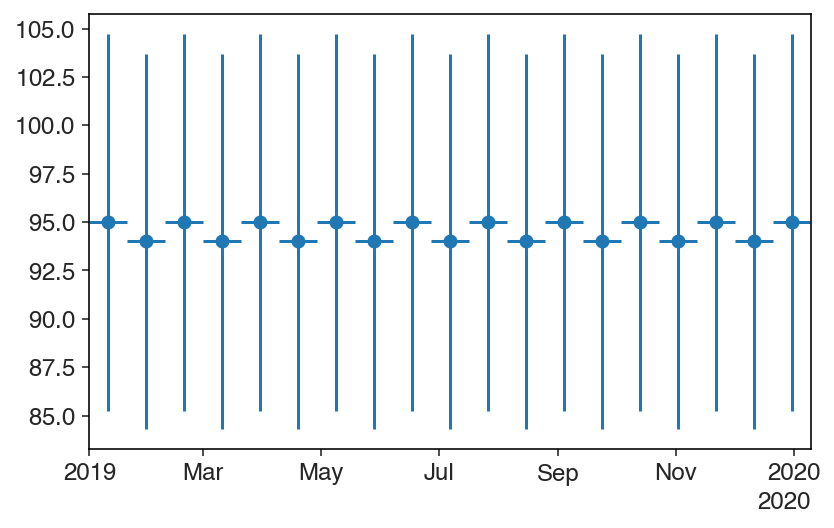

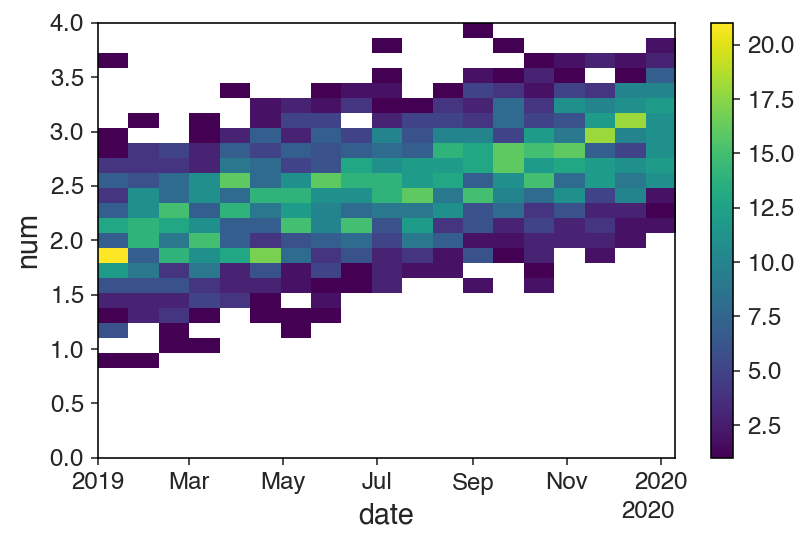

In [43]:
fig, ax = plt.subplots()
Hist1D(df["date"], bins=xbins).plot(ax=ax, show_errors=True)

fig, ax = plt.subplots()
Hist2D(df[["date","num"]], bins=[xbins, ybins]).plot(ax=ax)

Usual Hist2D operations work because the dates are just numbers internally

{'params': {'a': {'value': 0.0026438725594479903,
   'error': 8.637511688404938e-05},
  'b': {'value': -45.327891806327536, 'error': 1.5625513612084223}},
 'parnames': ('a', 'b'),
 'parvalues': array([ 2.64387256e-03, -4.53278918e+01]),
 'parerrors': array([8.63751169e-05, 1.56255136e+00]),
 'chi2': 33.45210298303815,
 'ndof': 28,
 'hfit': [ 2.01 ± 0.02    2.04 ± 0.02    2.07 ± 0.02    2.10 ± 0.02    2.14 ± 0.01
   2.17 ± 0.01    2.20 ± 0.01    2.24 ± 0.01    2.27 ± 0.01    2.30 ± 0.01
   2.34 ± 0.01    2.37 ± 0.01    2.40 ± 0.01    2.43 ± 0.01    2.47 ± 0.01
   2.50 ± 0.01    2.53 ± 0.01    2.57 ± 0.01    2.60 ± 0.01    2.63 ± 0.01
   2.67 ± 0.01    2.70 ± 0.01    2.73 ± 0.01    2.76 ± 0.01    2.80 ± 0.01
   2.83 ± 0.01    2.86 ± 0.01    2.90 ± 0.02    2.93 ± 0.02    2.96 ± 0.02]}

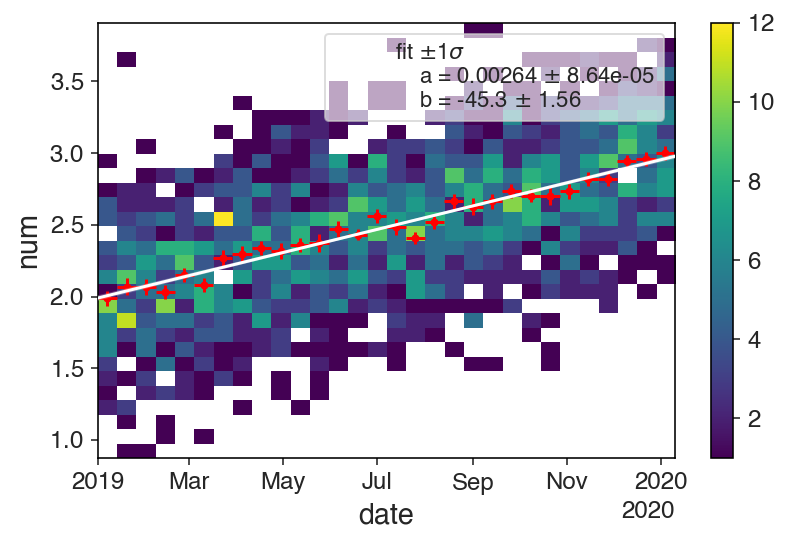

In [44]:
h = Hist2D(df[["date","num"]], bins=30)
h.plot()
h.profile("x").plot(show_errors=True, marker=".", color="r")
h.profile("x").fit("a*x+b",color="white")